In [34]:
!nvidia-smi

Sun Jan  9 02:44:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   27C    P0    25W /  70W |  14228MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
from tensorflow import keras

In [19]:
# asciiprint("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [3]:
# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
train, test = fashion_mnist.load_data()

In [5]:
X_train, y_train = train[0][:-5000]/255.0, train[1][:-5000]
X_valid, y_valid = train[0][-5000:]/255.0, train[1][-5000:]
X_test, y_test = test[0]/255.0, test[1]

In [77]:
# build model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [78]:
# model.summary()

In [79]:
# model.layers

In [80]:
# model_weights = model.get_weights()
# len(model_weights)

In [81]:
# model_weights[0].shape, model_weights[1].shape # weights and biases of dense layer 1

In [82]:
# model_weights[2].shape, model_weights[3].shape

In [83]:
# model_weights[4].shape, model_weights[5].shape

In [84]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [85]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=8192, verbose=0, validation_data= (X_valid, y_valid))

In [86]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

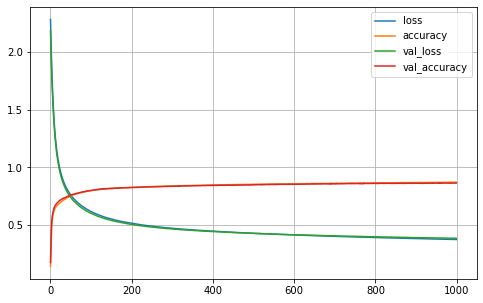

In [88]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
# plt.gca().set_ylim(0,1)
plt.show()

In [89]:
# model evaluation
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8539


[0.41622093319892883, 0.8539000153541565]

In [90]:
# model prediction
unknown = X_test[:3]
y_proba = model.predict(unknown)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.22, 0.  , 0.65],
       [0.  , 0.  , 0.97, 0.  , 0.01, 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [91]:
import numpy as np
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [92]:
unknown_labels = y_test[:3]
unknown_labels

array([9, 2, 1], dtype=uint8)

In [93]:
y_pred == unknown_labels

array([ True,  True,  True])